TASK:
1. 基于iris.csv数据，建立决策树模型，评估模型表现
2. 可视化决策树结构
3. 修改min_samples_leaf参数，对比模型结果

In [3]:
#load the data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('iris.csv')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sl,sw,pl,pw = data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3]
X = data.iloc[:,0:4]

n_clusters = 3
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

labels = KM.labels_
data['label'] = labels
y = data['label']
silhouette_coefficient = silhouette_score(X,y)
print(f"{silhouette_coefficient:.6f}")

0.551192


In [5]:
print(y.value_counts())
print(X.shape,y.shape)

label
0    61
1    50
2    39
Name: count, dtype: int64
(150, 4) (150,)


In [6]:
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      1  
1      1  
2      1  
3      1  
4      1  


In [7]:
data.to_csv('iris_data_label.csv', index=False, encoding='utf-8-sig')

In [19]:
#etablih the decision tree model
from sklearn import tree
dc_tree = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5)
dc_tree.fit(X,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
#evalueate the model
y_predict = dc_tree.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9866666666666667


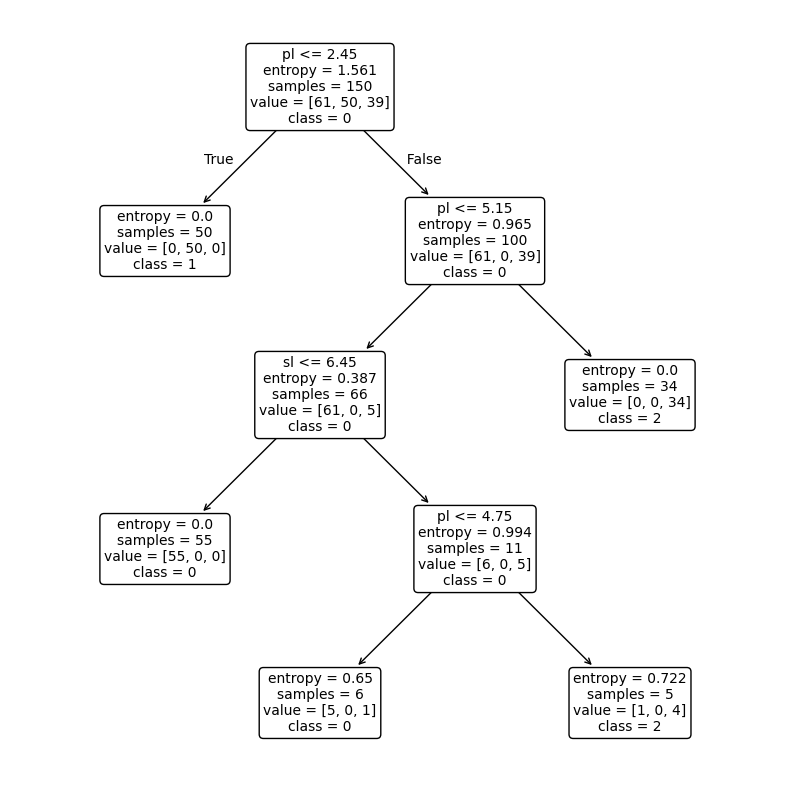

In [36]:
#visualize the tree
%matplotlib inline
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(10,10))
plot_tree(
    dc_tree, 
    filled=False,  # 填充颜色区分节点
    feature_names=['sl','sw','pl','pw'], 
    class_names=['0','1','2'],  
    rounded=True,  # 节点设为圆角，更美观
    fontsize=10  # 调整字体大小
)
plt.show()

SUMMARY:
1. 通过建立决策树，可实现对标签数据的有效分类
2. 通过修改叶子节点最少样本数对应参数min_samples_leaf，可调控制树的分支深度
3. [核心算法参考链接](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)